<a href="https://colab.research.google.com/github/LeoFontez/AcidentesAereos/blob/main/ProjetoAcidentesAereos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bibliotecas**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import statistics as static
import seaborn as sns

# Neste relatório iremos aprofundar e explicar o que cada biblioteca faz e a sua finalidade

## **Numpy** 
significa Numerical Python, é uma poderosa biblioteca da linguagem de programação Python, que consiste em objetos chamados de arrays (matrizes), que são multidimensionais. Além disso, essa biblioteca vem com uma coleção de rotinas para processar esses arrays.

##**Pandas**
Pandas é uma biblioteca de software criada para a linguagem Python para manipulação e análise de dados. Em particular, oferece estruturas e operações para manipular tabelas numéricas e séries temporais.

##**Collections Counter**
É uma subclasse dict para contar objetos. É uma coleção onde os elementos são armazenados como chaves de dicionário e suas contagens são armazenadas como valores de dicionário.

##**Seaborn**
Uma biblioteca de visualização de dados do Python baseado no Matplotlib. Ele provê uma interface de alto nível para construção de gráficos estatísticos atrativos e informativos.


# Importação de Dados:
Neste projeto estaremos utilizando os dados fornecidos pelo Centro de Investigação e Prevenção de Acidentes Aeronáuticos (cenipa) com relação dos dados ocorridos entre 2010 e 2019

In [ ]:
df = pd.read_csv('/content/ocorrencias_cenipa.csv')

# **Trabalhando com dados**

Para facilitar nossas análises, optamos em criar uma função que consiga armazenar os dados de forma horizontal nos graficos de barra

In [ ]:
def horizontal(linhas, ax): 
    for linha in linhas:
        height = linha.get_height()
        ax.annotate('{}'.format(height),
                    xy=(linha.get_x() + linha.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize = (20, 12))

<Figure size 1440x864 with 0 Axes>

<Figure size 1440x864 with 0 Axes>

# Resumo de Ocorrências
Conseguimos analisar no gráfico, uma média de 524 acidentes por ano. Sendo sua grande parte, ocasionada por incidentes.

Os incidentes são considerados circunstâncias acidentais que não esperadas.

Text(0.5, 1.0, 'Ocorrências entre 2010 e 2019')

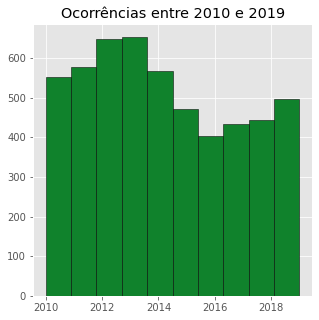

In [ ]:
df["ano"].hist(bins = 10, ec = "k", color = "#10822C", figsize=(5, 5))
plt.title("Ocorrências entre 2010 e 2019")


# Classificação das ocorrências


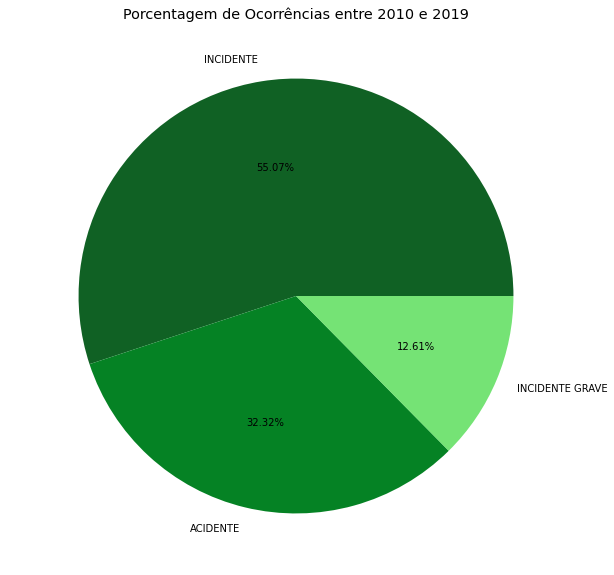

In [ ]:
plt.style.use("ggplot")
cores=['#106124', '#058224', '#52dc52cc']

df['tipo'].value_counts().plot(kind='pie',autopct='%.2f%%' ,label=" ", figsize=(10, 10),colors=cores)
plt.title("Porcentagem de Ocorrências entre 2010 e 2019")
plt.show()

# Coluna Região
Para facilitar a visualização, foi decidido acrescentar uma coluna para referenciar uma região, a partir de estados selecionados.

In [ ]:
regiao = {
    "Norte":['AM', 'PA', 'RR', 'AC','RO','AP', 'TO'],
    "Sul":['PR', 'SC', 'RS'],
    "Centro Oeste":['MT', 'MS', 'GO', 'DF'],
    "Nordeste":['BA', 'CE','MA', 'PB', 'PE', 'RN', 'SE', 'AL', 'PI'],
    "Sudeste":['SP', 'RJ', 'MG','ES'],
}
tipos = ['ACIDENTE', 'INCIDENTE','INCIDENTE GRAVE']
dic_01 = {i: [ len([k for k in list(df.loc[df['tipo'] == i, ['estado']]['estado'])
                    if k in regiao[j]]) for j in regiao.keys()] for i in tipos}

dic_01['Região'] = list(regiao.keys())
df_regiao = pd.DataFrame(dic_01)

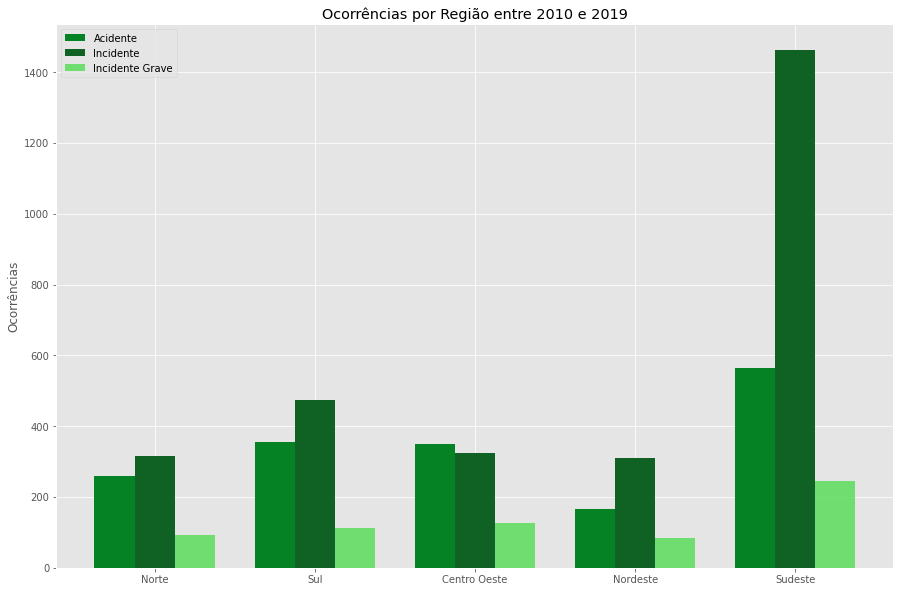

In [ ]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(15, 10))
width = 0.25
l1 = np.arange(5)
l2 = [ x + width for x in l1]
l3 = [ x + width for x in l2]

linha1 = ax.bar(l1, df_regiao['ACIDENTE'], width, label='Acidente', color="#058224")
linha2 = ax.bar(l2, df_regiao['INCIDENTE'], width, label='Incidente', color="#106124")
linha3 = ax.bar(l3, df_regiao['INCIDENTE GRAVE'], width, label='Incidente Grave', color="#52dc52cc")

ax.set_ylabel('Ocorrências')
ax.set_title('Ocorrências por Região entre 2010 e 2019')
ax.set_xticks(l2)
ax.set_xticklabels(df_regiao['Região'])
ax.legend()

grid=True
plt.show()

É nítido, que na região sudeste do Brasil é aonde se concentra os maiores casos relatados, muito pelo caso de ser uma das regiões com maior concetração de população, sem contar que nessa região existem mais possibilidades de trabalho ou até mesmo turismo.

Para o gráfico a seguir, apresentaremos as principais cidades em que se concentra essas ocorrências:


In [ ]:
estado = Counter(df['estado'])
situacaoDoEstado = sorted(estado, key = estado.get, reverse = True)
contagemDeEstado = sorted(list(estado.values()), reverse = True)

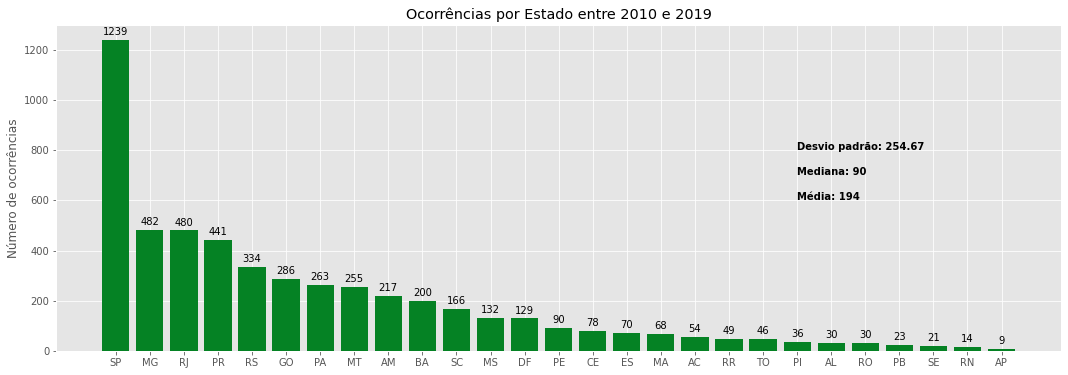

In [ ]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(18, 6))

x = situacaoDoEstado
y  = contagemDeEstado

reta1=ax.bar(x, y,color='#058224')

ax.set_xticks(x)
plt.ylabel("Número de ocorrências")
plt.title('Ocorrências por Estado entre 2010 e 2019')
plt.text(20, 800, 'Desvio padrão: %.2f'%(static.stdev(contagemDeEstado)), weight='bold') 
plt.text(20, 700, 'Mediana: %d'%(np.median(np.array(contagemDeEstado))), weight='bold')
plt.text(20, 600, 'Média: %d'%(np.mean(np.array(contagemDeEstado))), weight='bold')  

horizontal(reta1, ax)

plt.show()

Sendo considerada o principal centro financeiro do Brasil, São Paulo se destaca por haver diversos voos, sejam eles nacionais ou internacionais, o que faz com que identifiquemos esse desvio de 482 casos para 1239.

Isso faz com que com analisamos, **"quais as principais ocorrências entre as aeronaves?"**

In [ ]:
tipoDeAeronave = Counter(df['aeronave_tipo'])

tipo = sorted(tipoDeAeronave, key = tipoDeAeronave.get, reverse = True)

cont = sorted(list(tipoDeAeronave.values()), reverse = True)

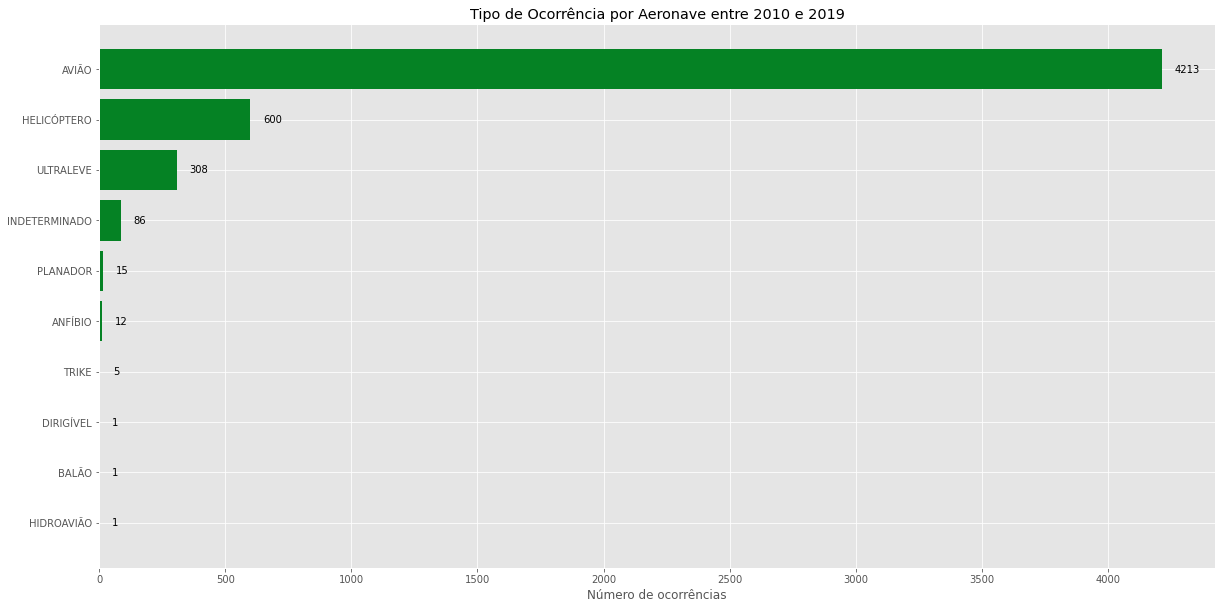

In [ ]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(20, 10))

x=tipo
y=cont

reta1=ax.barh(x, y, color='#058224')

for i, valor in enumerate(y):
    ax.text(valor + 50, i, str(valor),va='center')

ax.invert_yaxis()
plt.xlabel("Número de ocorrências")
plt.title('Tipo de Ocorrência por Aeronave entre 2010 e 2019')
plt.show()

É mais do que nítido que avião seria a principal aeronave causadora do acidente, até porque, o Brasil utiliza o mesmo como principal meio de viagem áereo, ficando na frente de helicópteros, que são aeronaves mais particulares, sendo utilizada por televisões, policias e bombeiros.
Apesar de que no Brasil não haja tanto transporte turístico, é possível identificar a Ocorrência de balões e dirigiveis, após algumas consultas de jornais virtuais, identificamos um caso ocorrido com o balão.

**Balão**: Ocorrido no dia 30/07/2017, um balão tripulado fez um pouso forçado após pegar fogo durante o voo na tarde deste dia. Segundo a Polícia Militar, apesar do susto, não houve feridos.

Não foi encontrado notícias a respeito do **Dirigível** de fabricante "Maule Aircraft", porém ao que tudo indica, é que foi um acidente ocorrendo duas aeronaves, sendo um problema no cruzeiro, não há indícios se a aeronave foi liberada após o acidente



#**Regressão Linear**
Antes de analisarmos nossos dados, precisamos entender do que estamos falando.

A Regressão Linear é uma equação para se estimar a condicional de uma variável y, dados os valores de algumas outras variáveis x. A regressão, em geral, tem como objetivo tratar de um valor que não se consegue estimar inicialmente.

In [ ]:
dataFrame = pd.DataFrame()
dataFrame['x'] = df['aeronaves_envolvidas']
dataFrame['y'] = df['aeronave_assentos']
x_valores = dataFrame[['x']]
y_valores = dataFrame[['y']]

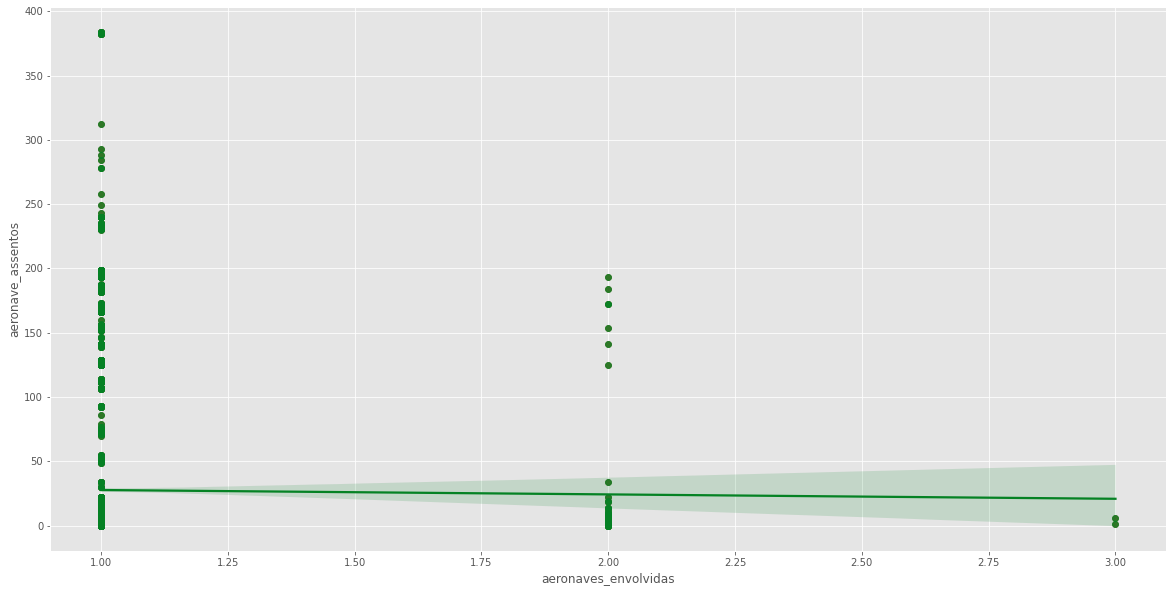

In [ ]:
plt.figure(figsize=(20,10))

plt.scatter(dataFrame['x'].values, dataFrame['y'].values)
sns.regplot(x='aeronaves_envolvidas', y='aeronave_assentos', data=df,color="#058224")
plt.show()

Podemos considerar aviões de grande porte, aqueles que ultrapassam a quantidade de 72 assentos, sendo eles aviões de classe econômica e até mesmo de primeira classe, já os aviões pequenos, são aqueles particulares e até mesmo os jatinhos que possuem até 20 assentos.

A partir dessas conclusão, identificamos uma presença de acidentes ocorrendo apenas 1 aeronave, sendo ela, aviões de médio e grande porte, sendo na maioria das vezes, ocasionadas por fatores individuas, na qual não é ocorrido por terceiros. Podemos dar como exemplo: pane seca, falha no motor no solo, estouro de pneus, colisão com obstaculos. Da mesma forma que não descartamos situações aéreas, como colisões com aves, falha no trem de pouso, dentre outros

Por outro lado, identificamos uma presença de aeronaves de "pequeno porte" realizando colisões com outra aeronave, nesse caso, a ocorrência pode ser ocasionado por terceiros, como principal exemplo: colisão entre aeronaves no solo, muitos desses casos são ocasionados por falta de atenção dos pilotos. Da mesma forma que também não descartamos o fato de ocorrer problemas no sistema de tráfego aéreo, ocorrendo uma falha gravíssima do controlador de trafego aéreo

# **Conclusão**
Nesse projeto, abordamos os principais relatórios de acidentes aéreos, ocasionados entre 2010 e 2019 de forma mais simples e dinâmica para a apresentação.

Foi realizada diversas pesquisas para chegarmos nessas conclusões, apesar de muitos dados não terem sido documentados por mídias jornalísticas

Apesar de tudo, identificamos um  mais incidentes do que acidentes, nos dizendo que apesar de fatalidades, não tiveram o intuito de ser realizado.

# **Referências**

CENIPA, Sobre nós, disponível em: https://cenipavirtual.aer.mil.br/

CENIPA, Ocorrências Aeronáuticas na Aviação Civil Brasileira, disponível em: https://dados.gov.br/dataset/ocorrencias-aeronauticas-da-aviacao-civil-brasileira

RODRIGUES, Vitor, Algumas dicas para gráficos mais bonitos, disponível em: https://vitorborbarodrigues.medium.com/visualiza%C3%A7%C3%A3o-de-dados-com-matplotlib-alguns-conceitos-intermedi%C3%A1rios-b33fcda50138

BUDKEWICZ, Matheus, Gráficos de pizza com matplotlib (piechart), disponível em: https://medium.com/horadecodar/gr%C3%A1ficos-de-pizza-com-matplotlib-piechart-33ea9760ad87

SOROCABA E JUNDIAI, G1, Balão tripulado em chamas faz pouso forçado em casa de Iperó, disponível em: https://g1.globo.com/sao-paulo/sorocaba-jundiai/noticia/balao-tripulado-em-chamas-faz-pouso-forcado-em-casa-de-ipero.ghtml

COMPAREPRIVATEPLANES, Quantos passageiros pode caber um jato particular?, disponível em: https://compareprivateplanes.com/pt/articles/how-many-passengers-can-a-private-jet-fit